In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
from sklearn.metrics import classification_report, confusion_matrix
  
# importing deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing import image
  
import cv2
  
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
path = '../input/dog-breed-identification/'
os.listdir(path)

['sample_submission.csv', 'test', 'train', 'labels.csv']

Loading datasets and image folders

In [3]:
# datasets
labels = pd.read_csv(path+'labels.csv')
sample = pd.read_csv(path+'sample_submission.csv')
  
# folders paths
train_path =  '../input/dog-breed-identification/train/'
test_path =  '../input/dog-breed-identification/test/'

In [4]:
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


EDA

In [5]:
print("labels_shape: ",labels.shape)
print("sample_shape: ",sample.shape)
print("length of train folder: ",len(os.listdir(train_path)))
print("length of test folder: ",len(os.listdir(test_path)))
# here labels.csv file and train folder size is same and sample file and test folder size is same

labels_shape:  (10222, 2)
sample_shape:  (10357, 121)
length of train folder:  10222
length of test folder:  10357


In [6]:
# checking labels file
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
# Finding the missing data
labels.isna().sum()

id       0
breed    0
dtype: int64

In [8]:
# finding count of 120 breed
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

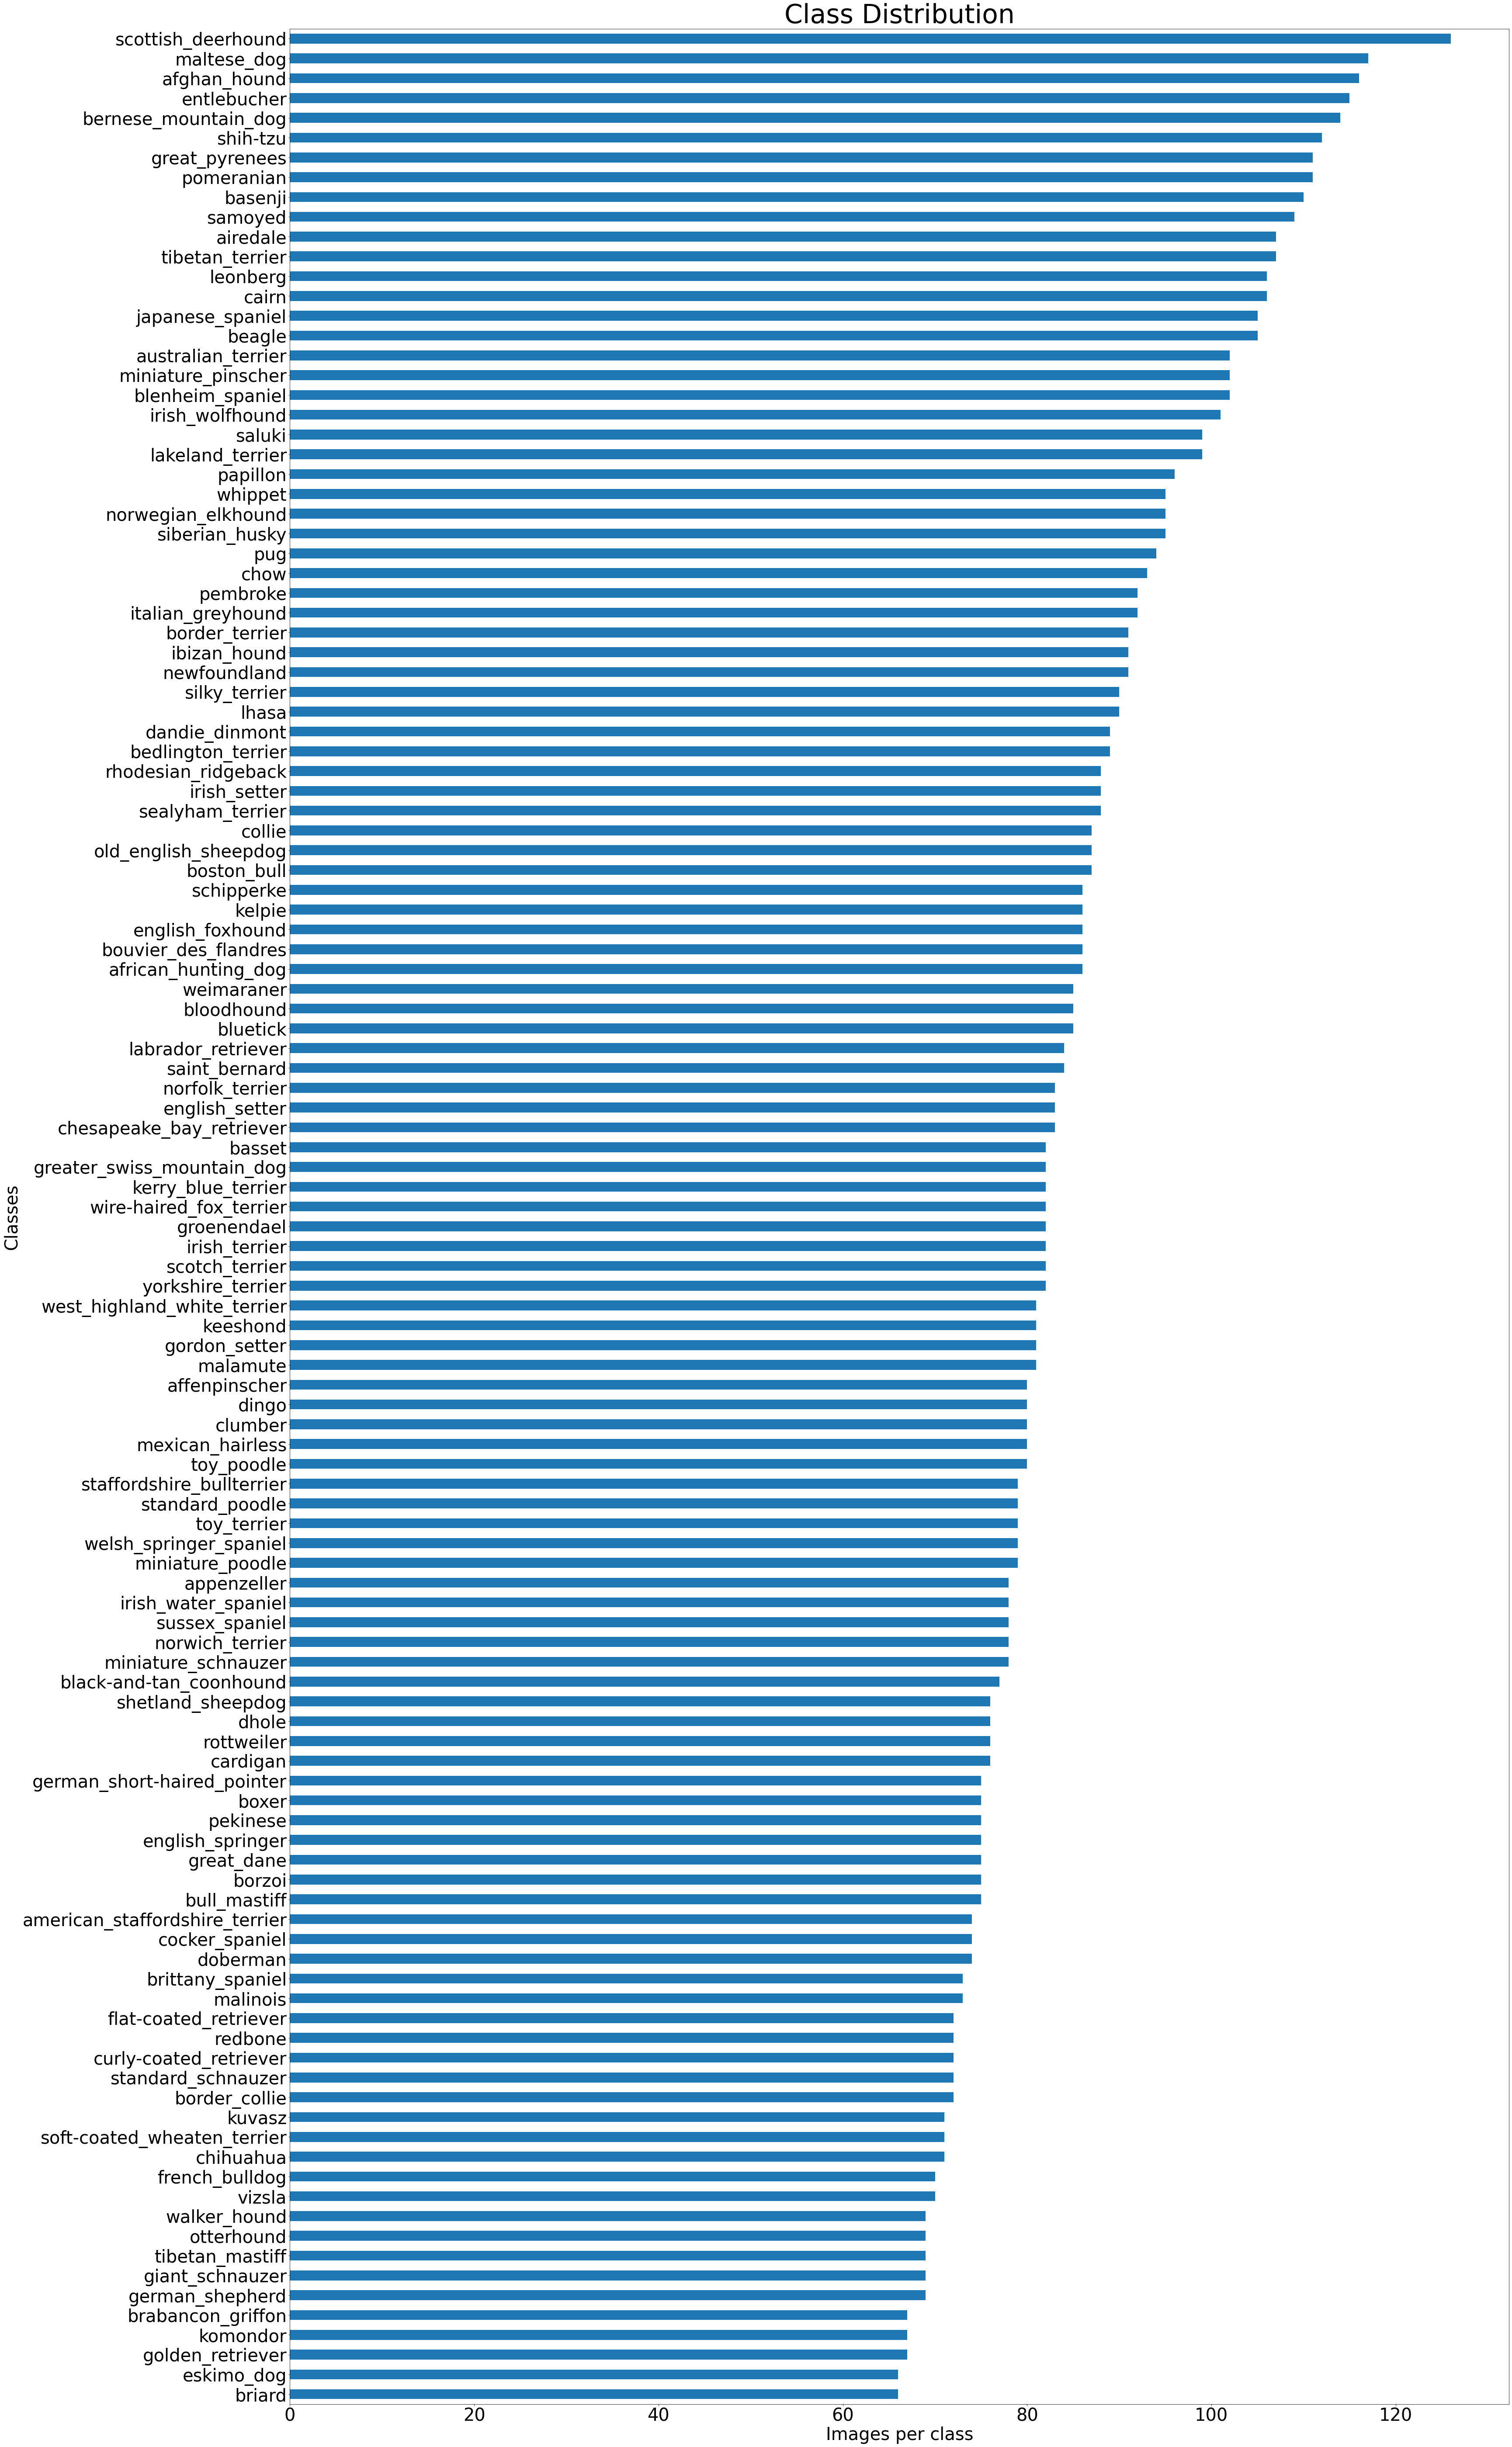

In [9]:
# visualizing the class/breed distribution
ax=pd.value_counts(labels['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

Ans a)From EDA, 1) There are 120 breeds
          2) Visualizing each 120 breeds' count
          3) If any missing data in labels' file

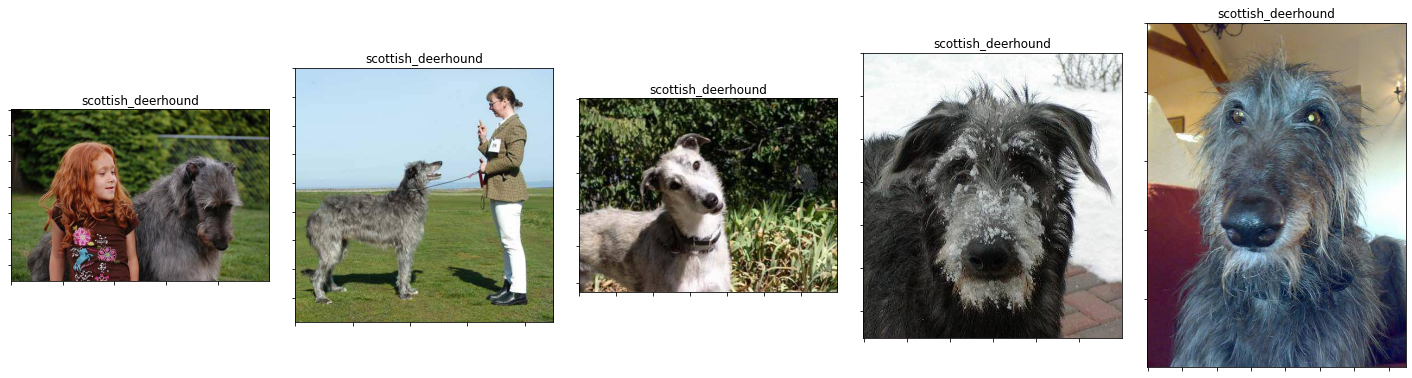

In [10]:
def plot_images(category):
    """ Plotin 5 images from given category """
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 20))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    temp = labels[labels['breed']==category].copy()
    temp.index = range(len(temp.index))
    for i in range(5):
        id_ = temp.loc[i, 'id']
        breed = temp.loc[i, 'breed']
        file = id_+'.jpg'
        img = cv2.imread(path+'train/'+file)
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].set_title(breed)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()
plot_images('scottish_deerhound')

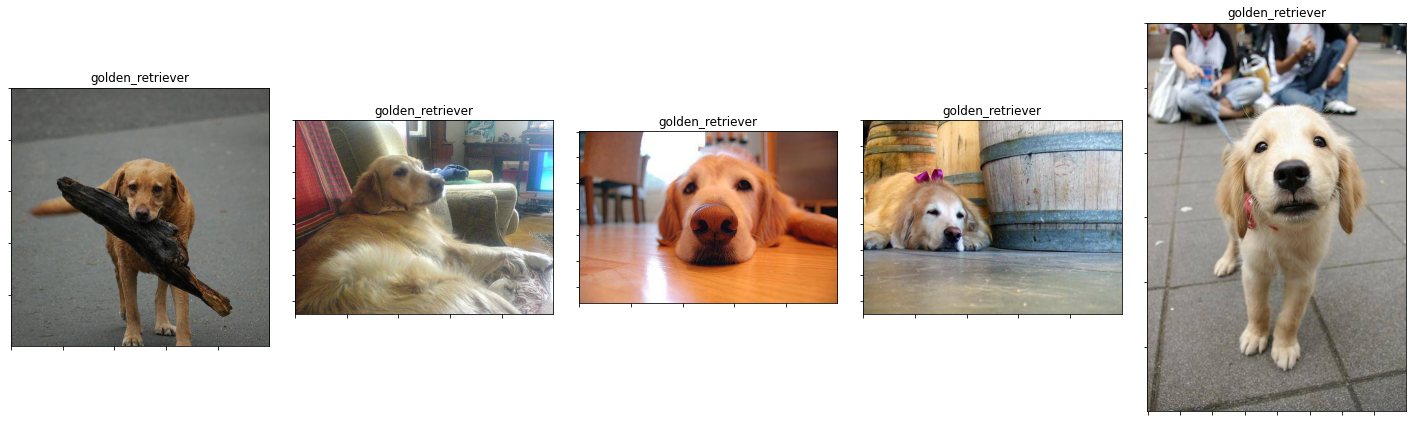

In [11]:
plot_images('golden_retriever')

In [12]:
# converting each image to .jpg format 
def to_jpg(id):
    return id+".jpg"
  
  
labels['id'] = labels['id'].apply(to_jpg)
sample['id'] = sample['id'].apply(to_jpg)

In [13]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


Ans b) As we have limited number of training images per class, we need to incorporate Image Augmentation for a good model. Its a pre-processing technique in which we augment the existing dataset with transformed versions of the existing images. We can perform scaling, rotations, increasing brightness, and other affine transformations. This is a useful technique as it helps the model to generalize the unseen data well.
ImageDataGenerator class is used for this purpose which provides a real-time augmentation of data

In [14]:
# Data agumentation and pre-processing using tensorflow
gen = ImageDataGenerator(
                  rescale=1./255.,
                  horizontal_flip = True,
                  validation_split=0.2 # training: 80% data, validation: 20% data
                 )
  
train_generator = gen.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'breed',
    subset="training",
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)
  
validation_generator = gen.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'breed',
    subset="validation",
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [15]:
x,y = next(train_generator)
x.shape # input shape of one record is (331,331,3) , 32: is the batch size

(32, 331, 331, 3)

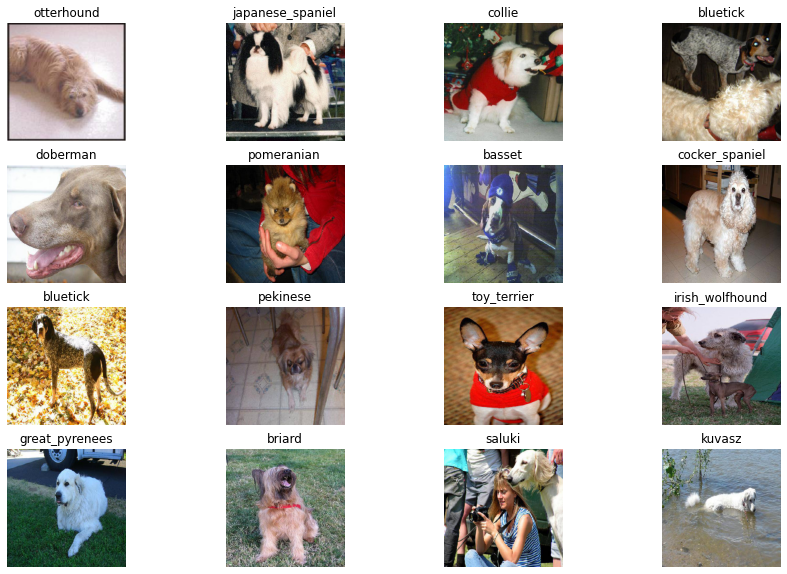

In [16]:
a = train_generator.class_indices
class_names = list(a.keys()) # storing class/breed names in a list
  
def plot_images(img,labels):
    """Plotting images from the train dataset of same sizes"""
    plt.figure(figsize=[15,10])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
          
plot_images(x,y)

In [17]:
class_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


Building the model

In [18]:
# del model

In [19]:
# load the InceptionV3 architecture with imagenet weights as base
base_model = tf.keras.applications.InceptionV3(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(331,331,3)
                     )
  
base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
  
model = tf.keras.Sequential([ 
        base_model,   
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

2022-03-28 06:24:12.429778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 06:24:12.525736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 06:24:12.526505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 06:24:12.527857: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step


In [20]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for 
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance

In [21]:
# Displaying summary report of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 9, 9, 2048)        21802784  
_________________________________________________________________
batch_normalization_94 (Batc (None, 9, 9, 2048)        14336     
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [22]:
# Load the TensorBoard notebook extension
# this is only for Colab
%load_ext tensorboard

In [23]:
tfbd = tf.keras.callbacks.TensorBoard(log_dir="logs")

2022-03-28 06:24:20.208836: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-28 06:24:20.208878: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-28 06:24:20.211101: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-03-28 06:24:20.398239: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-28 06:24:20.398422: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [24]:
# create log directory if not there
! rm -rf logs

In [25]:
# launching tensorboard before training
%tensorboard --logdir logs

In [26]:
# Defining callbacks to preserve the best results
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)
# early stopping call back

In [27]:
callbacks = [tfbd, early]

In [28]:
# Training the model
batch_size=32
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
  
# fit model
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=callbacks)
#                   callbacks=[tfbd])

2022-03-28 06:24:27.077868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-03-28 06:24:32.887622: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/255 [..............................] - ETA: 48:12 - loss: 4.8124 - accuracy: 0.0000e+00

2022-03-28 06:24:38.661704: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-28 06:24:38.661767: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/255 [..............................] - ETA: 2:13 - loss: 4.8666 - accuracy: 0.0000e+00 

2022-03-28 06:24:39.036149: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-28 06:24:39.037406: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-28 06:24:39.192672: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 685 callback api events and 682 activity events. 
2022-03-28 06:24:39.219821: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


  3/255 [..............................] - ETA: 1:59 - loss: 4.8302 - accuracy: 0.0000e+00

2022-03-28 06:24:39.257678: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_03_28_06_24_39

2022-03-28 06:24:39.278309: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_03_28_06_24_39/415188bb3546.trace.json.gz
2022-03-28 06:24:39.343313: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_03_28_06_24_39

2022-03-28 06:24:39.349172: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2022_03_28_06_24_39/415188bb3546.memory_profile.json.gz
2022-03-28 06:24:39.351005: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/train/plugins/profile/2022_03_28_06_24_39
Dumped tool data for xplane.pb to logs/train/plugins/profile/2022_03_28_06_24_39/415188bb3546.xplane.

255/255 [==============================] - 125s 449ms/step - loss: 1.9794 - accuracy: 0.5432 - val_loss: 0.5152 - val_accuracy: 0.8418
Epoch 2/25
255/255 [==============================] - 80s 312ms/step - loss: 0.6112 - accuracy: 0.8322 - val_loss: 0.4566 - val_accuracy: 0.8661
Epoch 3/25
255/255 [==============================] - 74s 291ms/step - loss: 0.4726 - accuracy: 0.8634 - val_loss: 0.4384 - val_accuracy: 0.8805
Epoch 4/25
255/255 [==============================] - 80s 313ms/step - loss: 0.3480 - accuracy: 0.8979 - val_loss: 0.4373 - val_accuracy: 0.8819
Epoch 5/25
255/255 [==============================] - 81s 317ms/step - loss: 0.3129 - accuracy: 0.9051 - val_loss: 0.4683 - val_accuracy: 0.8770
Epoch 6/25
255/255 [==============================] - 81s 317ms/step - loss: 0.2661 - accuracy: 0.9181 - val_loss: 0.4453 - val_accuracy: 0.8864
Epoch 7/25
255/255 [==============================] - 81s 316ms/step - loss: 0.2339 - accuracy: 0.9273 - val_loss: 0.5611 - val_accuracy: 0.

In [29]:
# saving the model
model.save("InceptionV3_1.h5")

Visualizing model’s performance

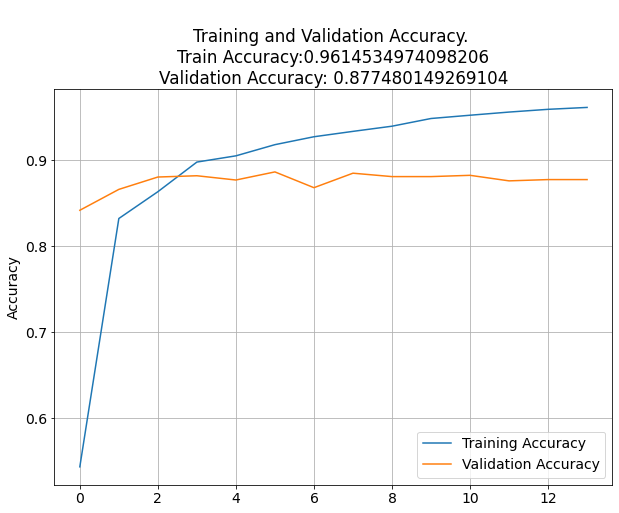

In [30]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')
plt.show()

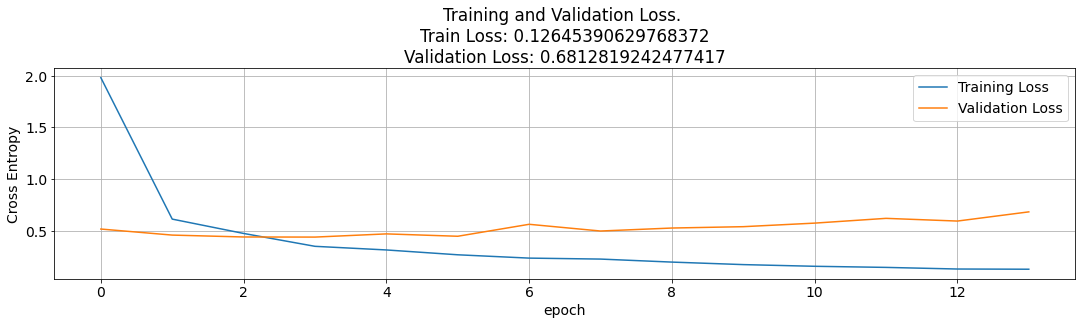

In [31]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

Comparision of different topologies and architecture:
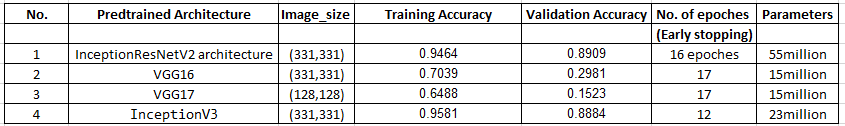

In [32]:
# Evaluating the accuracy of the model
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
  
print("Loss: ",accuracy_score[0])

64/64 [==============================] - 15s 238ms/step - loss: 0.4327 - accuracy: 0.8821
[0.4327377378940582, 0.8820939064025879]
Accuracy: 88.2094%
Loss:  0.4327377378940582


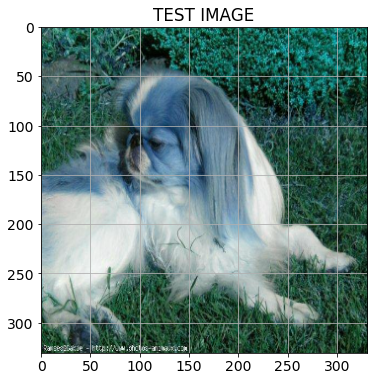

In [33]:
# Viewing the Test Image
test_img_path = test_path+"/000621fb3cbb32d8935728e48679680e.jpg"
  
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255
  
plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])
plt.show()

In [34]:
predictions = []
  
for image in sample.id:
    img = tf.keras.preprocessing.image.load_img(test_path +'/'+ image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
    img = tf.reshape(img, (-1, 331, 331, 3))
    prediction = model.predict(img/255)
    predictions.append(np.argmax(prediction))
  
my_submission = pd.DataFrame({'image_id': sample.id, 'label':  predictions})
my_submission.to_csv('submission.csv', index=False)
  
# Submission file ouput
print("Submission File: \n---------------\n")
# first 5 records for output
print(my_submission.head()) 


Submission File: 
---------------

                               image_id  label
0  000621fb3cbb32d8935728e48679680e.jpg     61
1  00102ee9d8eb90812350685311fe5890.jpg     94
2  0012a730dfa437f5f3613fb75efcd4ce.jpg     40
3  001510bc8570bbeee98c8d80c8a95ec1.jpg     88
4  001a5f3114548acdefa3d4da05474c2e.jpg    100
